In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

In [54]:
x,y = make_blobs(200, 2, centers=[[2,2],[10,10]], cluster_std = 3)
#centers - basically the points around which I want my data to be centered around, for one class (2,2) and for other class (10,10)

In [55]:
y[y==0] = -1

In [56]:
df = pd.DataFrame(x,columns=['x1', 'x2'])
df['y'] = y
df.head()

,x1,x2,y
0,7.914014,9.742757,1
1,9.344313,8.478702,1
2,4.489478,1.838131,-1
3,9.879797,6.806514,1
4,13.798102,9.728323,1


<AxesSubplot:xlabel='x1', ylabel='x2'>

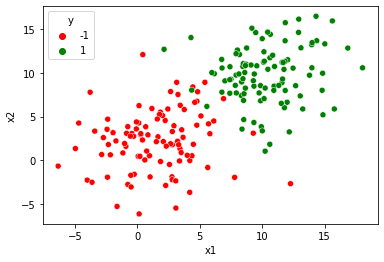

In [57]:
sns.scatterplot(x = df["x1"], y = df["x2"], hue = df['y'], palette = ['r','g'])

In [58]:
x_val=np.linspace(0,12,100)
#since max value of x1 is 12

In [59]:
#w0 = 0
#w = [1,1]
w = np.random.normal(size=(2,))
w0 = np.random.normal()

In [60]:
w

array([-0.6182935 , -1.49346516])

In [61]:
w0

0.48165850162229784

In [62]:
#using line eqn generating x2
y_val = (-w0 - w[0]*x_val)/w[1]

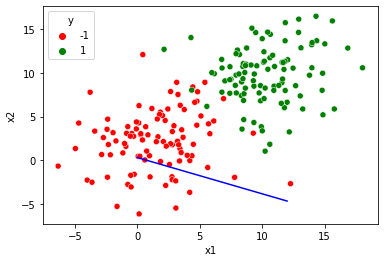

In [63]:
sns.scatterplot(x = df["x1"], y = df["x2"], hue = df['y'], palette = ['r','g'])
plt.plot(x_val,y_val,c='b')
plt.show()

In [64]:
def plot_line(w, w0, x, y):
    x_val=np.linspace(0,12,100)
    y_val = (-w0 - w[0]*x_val)/w[1]
    sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, palette = ['r','g'])
    plt.plot(x_val,y_val,c='b')
    plt.show()

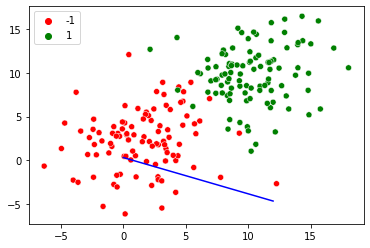

In [65]:
plot_line(w, w0, x, y)

In [66]:
#x is a single data point here
def distance_from_line(w,w0,x):
    d = (np.dot(w,x) + w0)/np.linalg.norm(w)
    return d

In [67]:
distance_from_line(w,w0,[2,2])

-2.31494429115051

In [68]:
def classifier(w,w0,x,y, iters = 10000):
    for i in range(iters):
        num_of_missclassifications = 0
        for xi, yi in zip(x,y):
            dist = distance_from_line(w,w0,xi)
            hs = np.sign(dist)
            if hs != yi:
                num_of_missclassifications +=1
                w = w + xi*yi
                w0 = w0+yi
        print("Accuracy {}".format(100-(100*num_of_missclassifications/len(y))))
        print("Weight w0 = {}, w1 = {}, w2 ={}". format(w0, w[0], w[1]))
        plot_line(w, w0, x,y)
        if num_of_missclassifications == 0:
            return w, w0
    return w, w0    

Accuracy 74.5
Weight w0 = -22.5183414983777, w1 = -0.7317894324989762, w2 =13.381500428879368


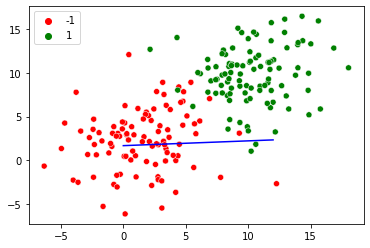

Accuracy 81.0
Weight w0 = -38.5183414983777, w1 = -0.3896926233557805, w2 =17.838570484409242


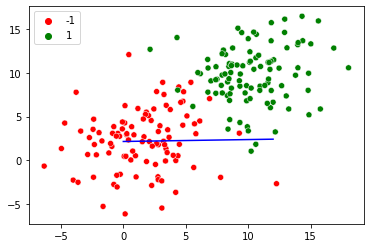

Accuracy 87.0
Weight w0 = -46.5183414983777, w1 = 3.422615766446441, w2 =16.725745811739365


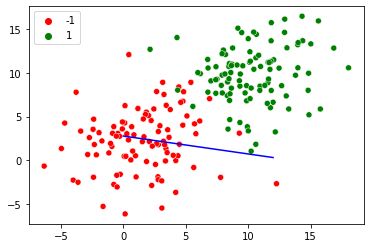

Accuracy 86.5
Weight w0 = -55.5183414983777, w1 = 7.062058831684848, w2 =13.76583782005509


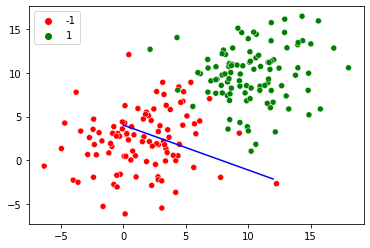

Accuracy 90.0
Weight w0 = -61.5183414983777, w1 = 0.10810968860740111, w2 =12.116100555579433


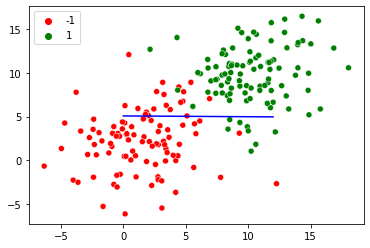

Accuracy 86.0
Weight w0 = -69.51834149837771, w1 = 2.6243790708831405, w2 =10.691906030562187


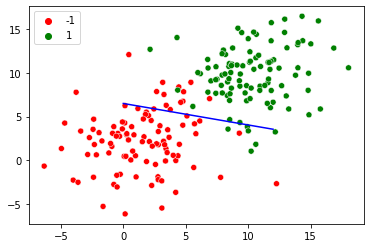

Accuracy 89.5
Weight w0 = -74.51834149837771, w1 = 2.7869560175918746, w2 =12.174621792523142


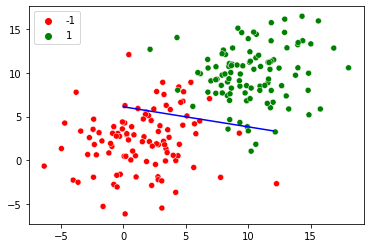

Accuracy 88.5
Weight w0 = -81.51834149837771, w1 = 0.8570226827900491, w2 =7.193390248840705


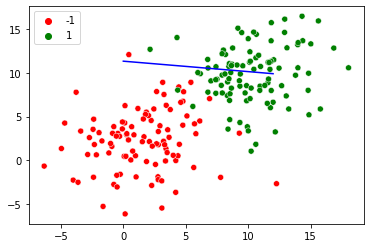

Accuracy 90.0
Weight w0 = -85.51834149837771, w1 = 6.191204479524847, w2 =10.02133827100105


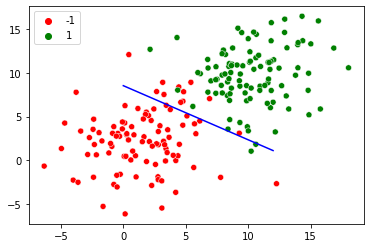

Accuracy 88.5
Weight w0 = -90.51834149837771, w1 = 5.616325649847086, w2 =12.269790626334158


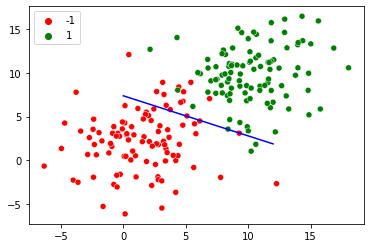

Accuracy 90.5
Weight w0 = -93.51834149837771, w1 = 6.921207305804531, w2 =9.830754415803339


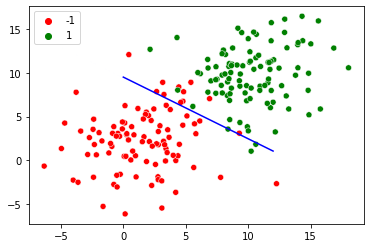

Accuracy 88.5
Weight w0 = -98.51834149837771, w1 = 6.346328476126766, w2 =12.079206771136446


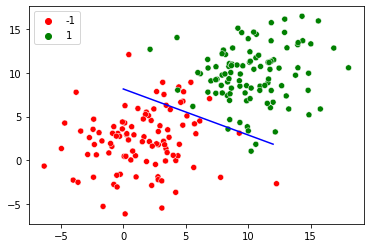

Accuracy 90.5
Weight w0 = -101.51834149837771, w1 = 7.651210132084204, w2 =9.640170560605625


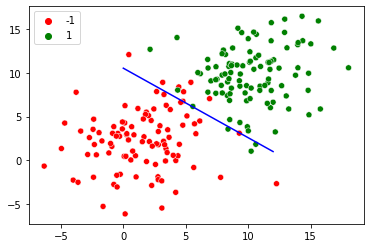

Accuracy 88.5
Weight w0 = -106.51834149837771, w1 = 7.076331302406443, w2 =11.888622915938734


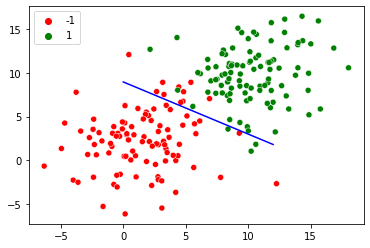

Accuracy 90.5
Weight w0 = -109.51834149837771, w1 = 8.38121295836388, w2 =9.44958670540791


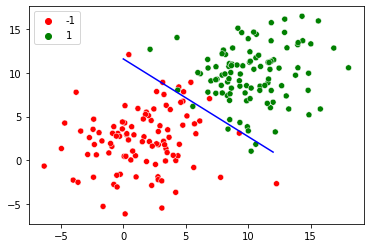

Accuracy 94.5
Weight w0 = -110.51834149837771, w1 = 6.2576136755992575, w2 =15.275542724329277


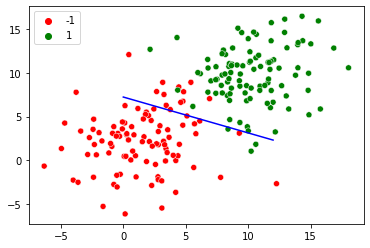

Accuracy 87.5
Weight w0 = -115.51834149837771, w1 = 5.856126976221406, w2 =12.055983211760543


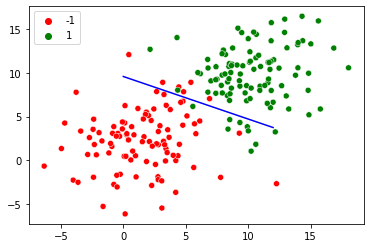

Accuracy 90.5
Weight w0 = -118.51834149837771, w1 = 9.231737723710124, w2 =11.848970725891308


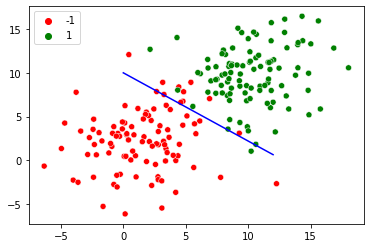

Accuracy 91.5
Weight w0 = -121.51834149837771, w1 = 7.246101496184172, w2 =13.116274987941175


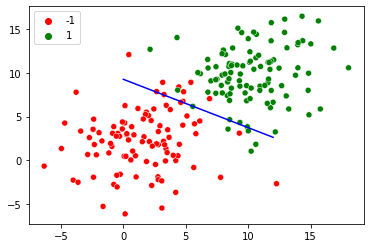

Accuracy 93.0
Weight w0 = -123.51834149837771, w1 = 6.143006368405091, w2 =17.425600068887707


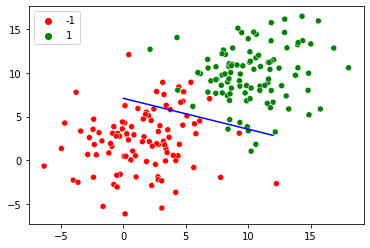

Accuracy 93.0
Weight w0 = -125.51834149837771, w1 = 4.202036535024002, w2 =18.062989627528054


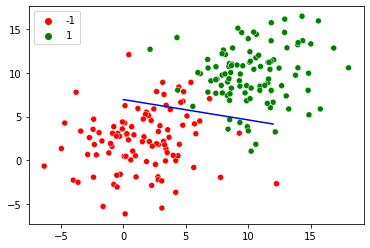

Accuracy 94.0
Weight w0 = -127.51834149837771, w1 = 8.504657357415786, w2 =14.489414313902223


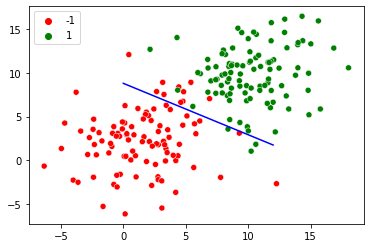

Accuracy 91.5
Weight w0 = -130.5183414983777, w1 = 3.2244768627906932, w2 =18.781418318836117


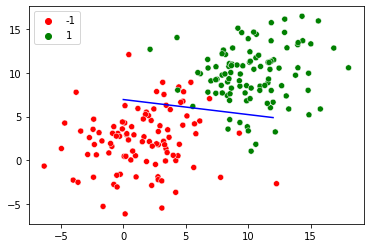

Accuracy 94.0
Weight w0 = -132.5183414983777, w1 = 7.527097685182477, w2 =15.207843005210286


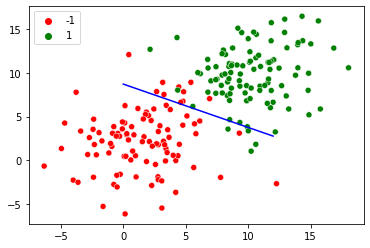

Accuracy 92.5
Weight w0 = -135.5183414983777, w1 = 4.039749134067014, w2 =18.65374223180453


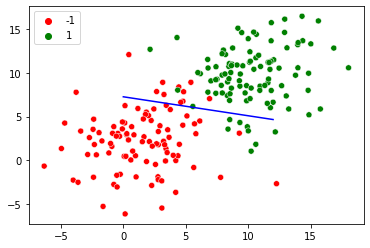

Accuracy 91.5
Weight w0 = -138.5183414983777, w1 = 12.49610950672651, w2 =11.99660781309384


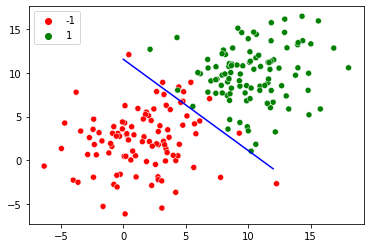

Accuracy 92.5
Weight w0 = -141.5183414983777, w1 = 14.300027495012996, w2 =11.042685409638253


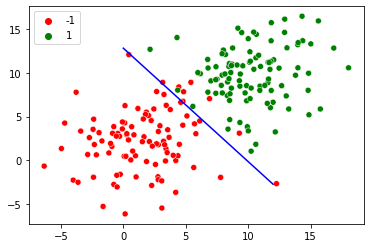

Accuracy 94.0
Weight w0 = -143.5183414983777, w1 = 5.402476781139141, w2 =20.173801573484877


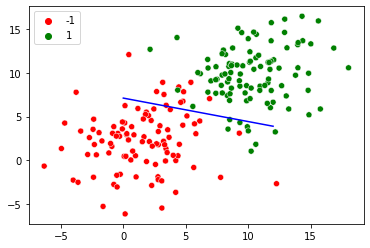

Accuracy 94.0
Weight w0 = -145.5183414983777, w1 = 9.705097603530925, w2 =16.600226259859042


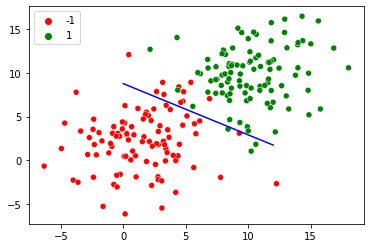

Accuracy 93.0
Weight w0 = -147.5183414983777, w1 = 7.764127770149836, w2 =17.23761581849939


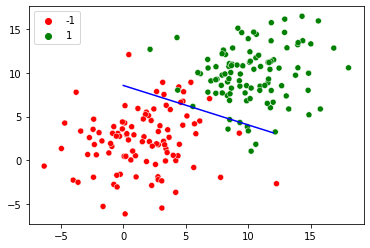

Accuracy 93.0
Weight w0 = -149.5183414983777, w1 = 5.519019440648991, w2 =20.66551996709091


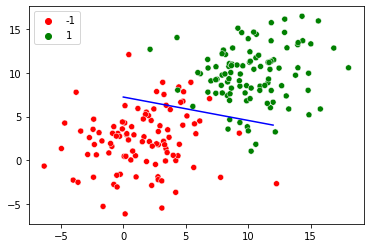

Accuracy 94.0
Weight w0 = -151.5183414983777, w1 = 9.821640263040775, w2 =17.091944653465077


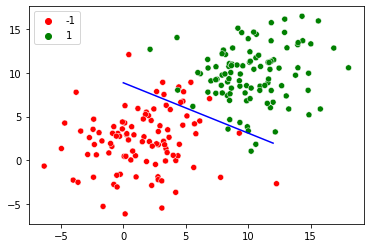

Accuracy 93.0
Weight w0 = -153.5183414983777, w1 = 7.8806704296596894, w2 =17.729334212105424


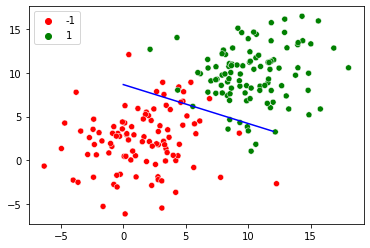

Accuracy 93.0
Weight w0 = -155.5183414983777, w1 = 5.635562100158845, w2 =21.157238360696944


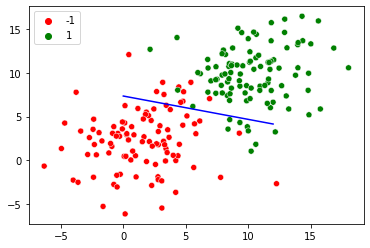

Accuracy 94.0
Weight w0 = -157.5183414983777, w1 = 12.927042158450002, w2 =14.869348660660176


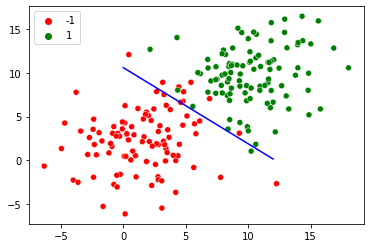

Accuracy 94.5
Weight w0 = -158.5183414983777, w1 = 9.089442169881695, w2 =17.369609802555473


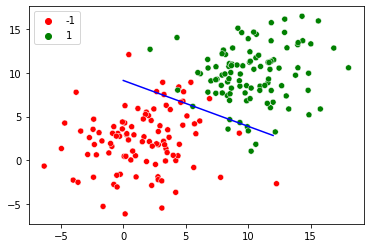

Accuracy 94.0
Weight w0 = -160.5183414983777, w1 = 9.513291784092159, w2 =19.60516852752723


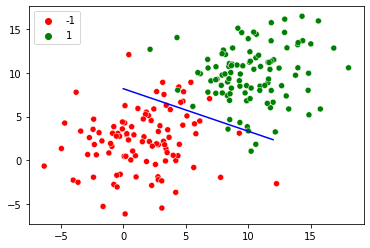

Accuracy 93.0
Weight w0 = -162.5183414983777, w1 = 7.572321950711073, w2 =20.242558086167577


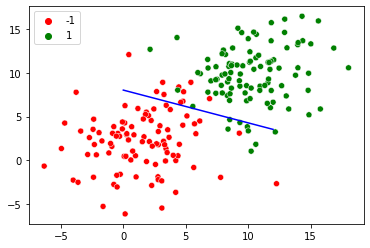

Accuracy 94.0
Weight w0 = -164.5183414983777, w1 = 10.784493172522597, w2 =18.76152478413885


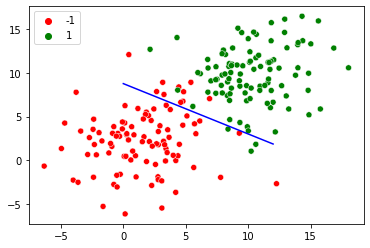

Accuracy 95.5
Weight w0 = -165.5183414983777, w1 = 12.067594248913343, w2 =17.9204321473945


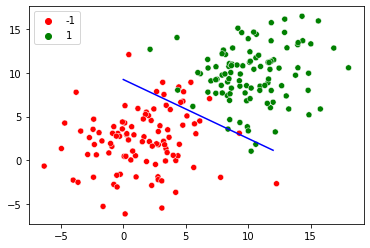

Accuracy 95.5
Weight w0 = -166.5183414983777, w1 = 10.371731101025633, w2 =17.628682097892536


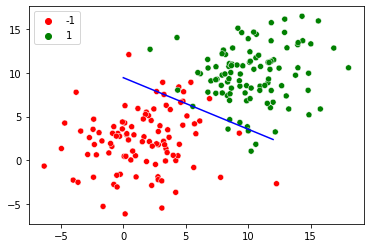

Accuracy 95.5
Weight w0 = -167.5183414983777, w1 = 10.855639291109808, w2 =17.349984095895874


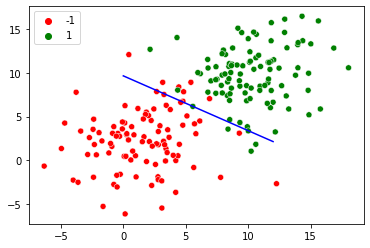

Accuracy 95.5
Weight w0 = -168.5183414983777, w1 = 11.339547481193987, w2 =17.071286093899207


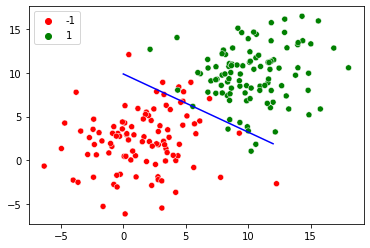

Accuracy 94.5
Weight w0 = -169.5183414983777, w1 = 7.501947492625684, w2 =19.571547235794505


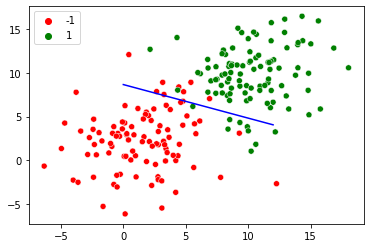

Accuracy 93.0
Weight w0 = -171.5183414983777, w1 = 13.454226495397274, w2 =13.817627756989545


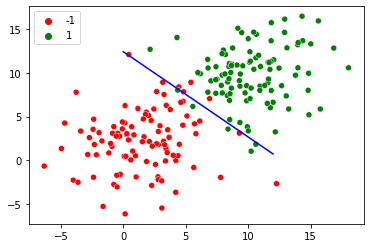

Accuracy 94.5
Weight w0 = -172.5183414983777, w1 = 11.330627212632647, w2 =19.643583775910916


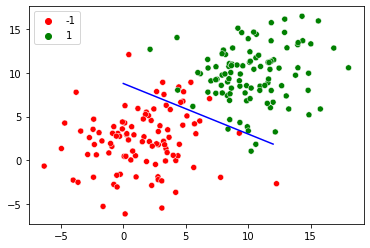

Accuracy 95.5
Weight w0 = -173.5183414983777, w1 = 9.634764064744937, w2 =19.351833726408955


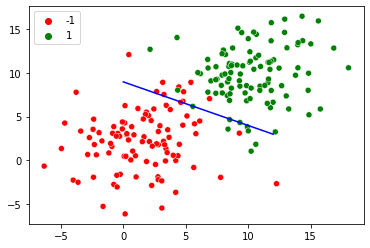

Accuracy 95.5
Weight w0 = -174.5183414983777, w1 = 14.078538201669014, w2 =15.736796522467426


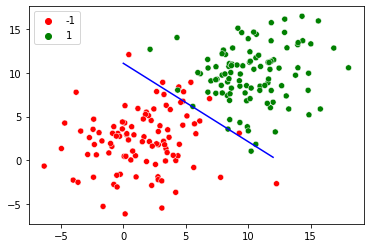

Accuracy 94.5
Weight w0 = -175.5183414983777, w1 = 10.240938213100707, w2 =18.237057664362723


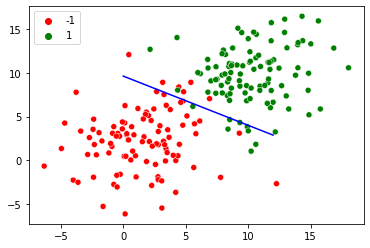

Accuracy 94.0
Weight w0 = -177.5183414983777, w1 = 8.837815991496148, w2 =18.82211674264578


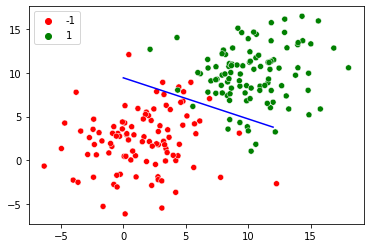

Accuracy 94.5
Weight w0 = -178.5183414983777, w1 = 7.677546431096884, w2 =21.805565554123277


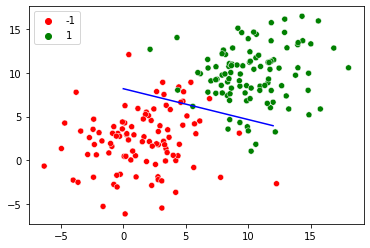

Accuracy 94.0
Weight w0 = -180.5183414983777, w1 = 11.981211438621527, w2 =18.270640920617062


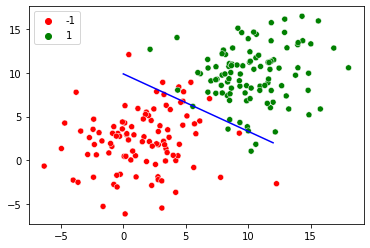

Accuracy 95.5
Weight w0 = -181.5183414983777, w1 = 12.465119628705706, w2 =17.9919429186204


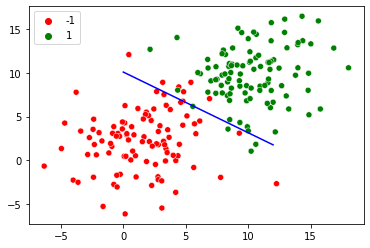

Accuracy 94.5
Weight w0 = -182.5183414983777, w1 = 8.627519640137402, w2 =20.492204060515697


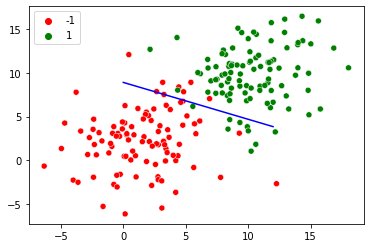

Accuracy 93.0
Weight w0 = -184.5183414983777, w1 = 14.579798642908992, w2 =14.738284581710737


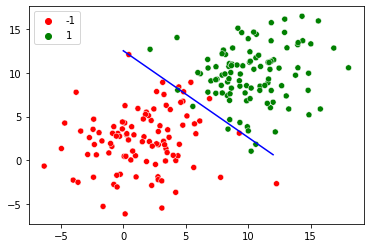

Accuracy 94.5
Weight w0 = -185.5183414983777, w1 = 10.766804180064709, w2 =20.70191900800235


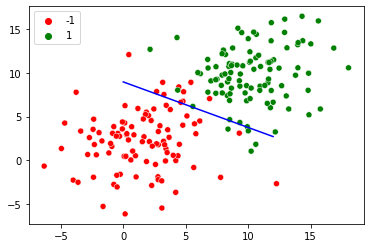

Accuracy 95.5
Weight w0 = -186.5183414983777, w1 = 12.847828522269188, w2 =20.42399373936238


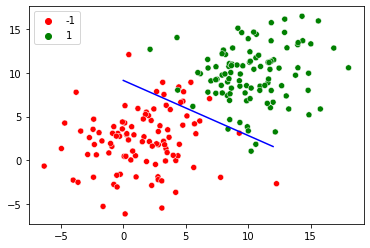

Accuracy 95.5
Weight w0 = -187.5183414983777, w1 = 11.679186477412193, w2 =21.73190945763791


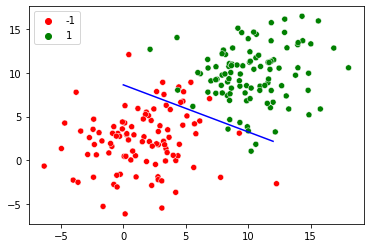

Accuracy 95.5
Weight w0 = -188.5183414983777, w1 = 9.983323329524483, w2 =21.440159408135948


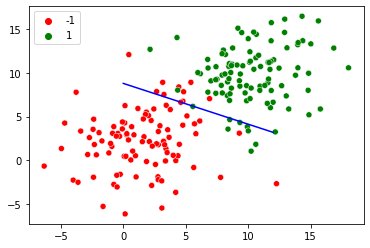

Accuracy 95.5
Weight w0 = -189.5183414983777, w1 = 14.218680964264534, w2 =14.286736830979882


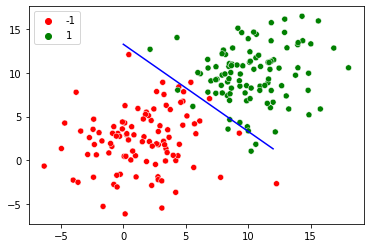

Accuracy 96.0
Weight w0 = -189.5183414983777, w1 = 14.316336994434158, w2 =20.62972161385975


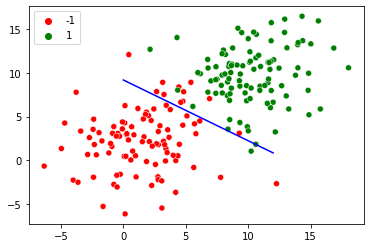

Accuracy 92.5
Weight w0 = -190.5183414983777, w1 = 13.372844171723324, w2 =17.537191303553154


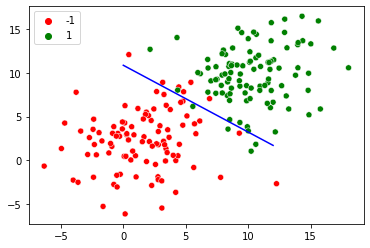

Accuracy 94.5
Weight w0 = -191.5183414983777, w1 = 9.535244183155017, w2 =20.03745244544845


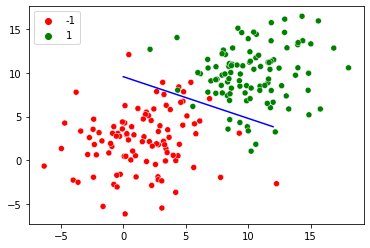

Accuracy 95.5
Weight w0 = -192.5183414983777, w1 = 11.312130029239738, w2 =22.550041766759655


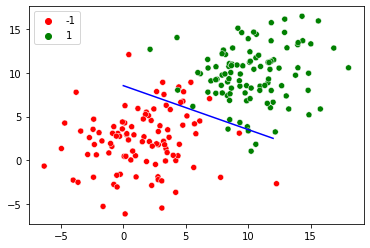

Accuracy 94.5
Weight w0 = -193.5183414983777, w1 = 19.179670521658338, w2 =16.271917271160724


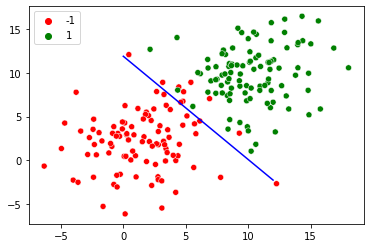

Accuracy 95.5
Weight w0 = -194.5183414983777, w1 = 10.529083871284056, w2 =21.286642575587138


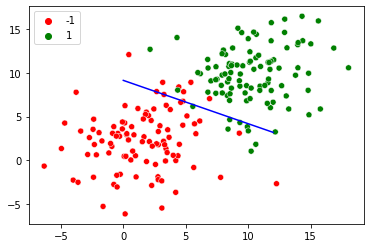

Accuracy 94.5
Weight w0 = -195.5183414983777, w1 = 11.72173930012456, w2 =20.147530315707357


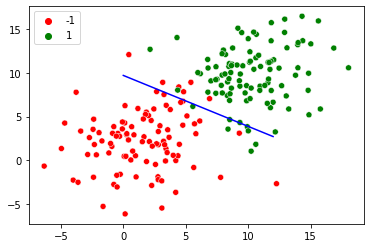

Accuracy 94.5
Weight w0 = -196.5183414983777, w1 = 19.285141296423404, w2 =16.6599204100596


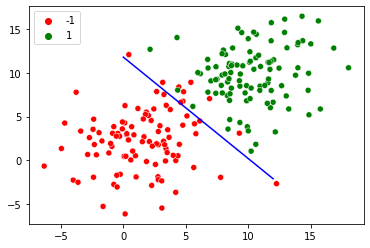

Accuracy 95.5
Weight w0 = -197.5183414983777, w1 = 10.634554646049123, w2 =21.67464571448601


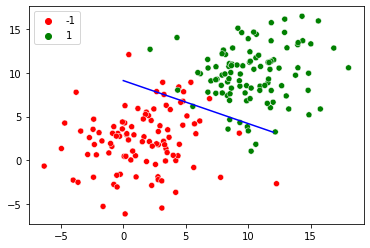

Accuracy 94.5
Weight w0 = -198.5183414983777, w1 = 11.827210074889626, w2 =20.53553345460623


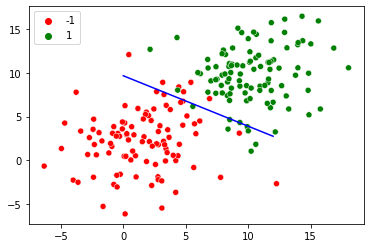

Accuracy 95.5
Weight w0 = -199.5183414983777, w1 = 15.347991057483044, w2 =19.331629090298385


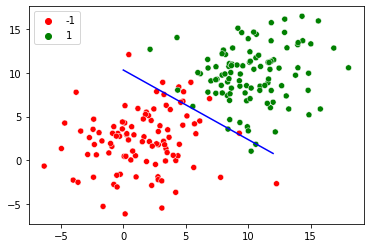

Accuracy 92.5
Weight w0 = -200.5183414983777, w1 = 14.404498234772207, w2 =16.23909877999179


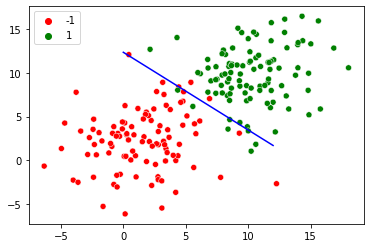

Accuracy 96.0
Weight w0 = -200.5183414983777, w1 = 16.24604940145052, w2 =18.86558987725261


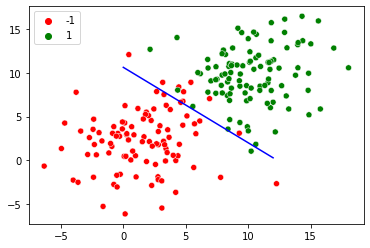

Accuracy 92.5
Weight w0 = -201.5183414983777, w1 = 15.302556578739685, w2 =15.773059566946014


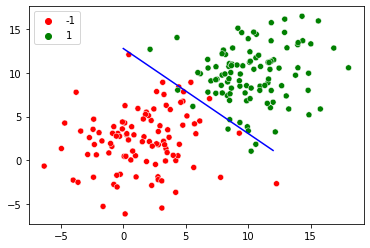

Accuracy 93.5
Weight w0 = -202.5183414983777, w1 = 16.59413684130738, w2 =16.15686247007869


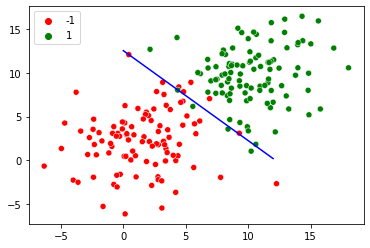

Accuracy 94.5
Weight w0 = -203.5183414983777, w1 = 12.12743203161923, w2 =22.88041666365607


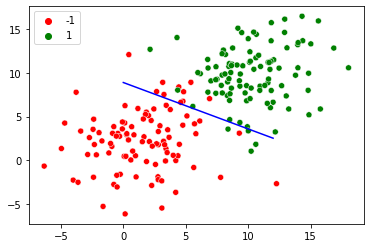

Accuracy 95.5
Weight w0 = -204.5183414983777, w1 = 9.16800564368645, w2 =23.7181832998023


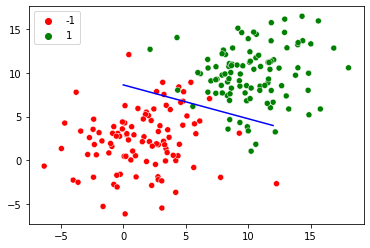

Accuracy 93.0
Weight w0 = -206.5183414983777, w1 = 15.12028464645804, w2 =17.96426382099734


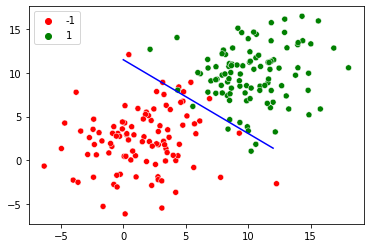

Accuracy 94.5
Weight w0 = -207.5183414983777, w1 = 12.79903031379291, w2 =19.684169763927486


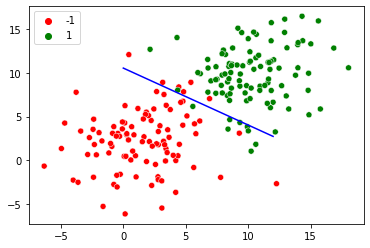

Accuracy 94.5
Weight w0 = -208.5183414983777, w1 = 16.996653580524594, w2 =16.235170129280053


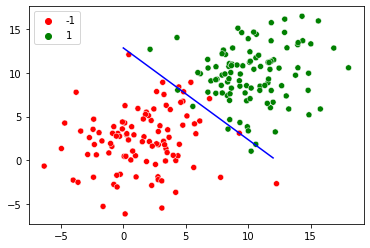

Accuracy 94.5
Weight w0 = -209.5183414983777, w1 = 12.529948770836443, w2 =22.958724322857435


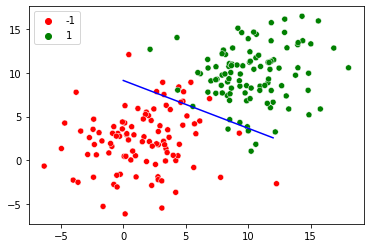

Accuracy 94.5
Weight w0 = -210.5183414983777, w1 = 17.03171053368788, w2 =16.71921009825883


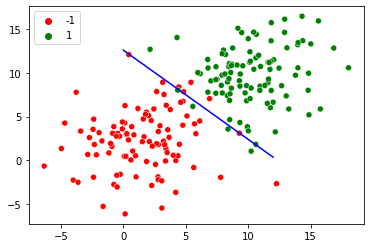

Accuracy 94.5
Weight w0 = -211.5183414983777, w1 = 12.565005723999727, w2 =23.442764291836212


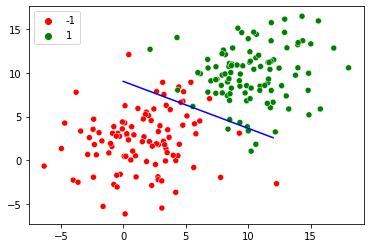

Accuracy 94.5
Weight w0 = -212.5183414983777, w1 = 17.066767486851163, w2 =17.203250067237608


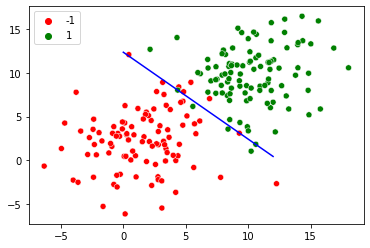

Accuracy 94.5
Weight w0 = -213.5183414983777, w1 = 12.600062677163011, w2 =23.92680426081499


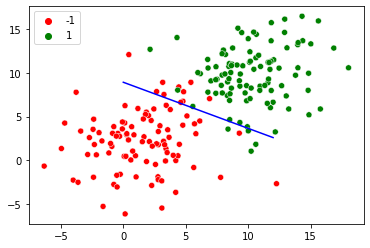

Accuracy 94.5
Weight w0 = -214.5183414983777, w1 = 17.101824440014447, w2 =17.687290036216385


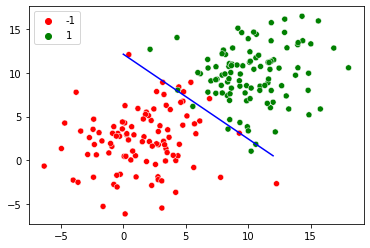

Accuracy 95.5
Weight w0 = -215.5183414983777, w1 = 10.263626843900349, w2 =24.3341907109602


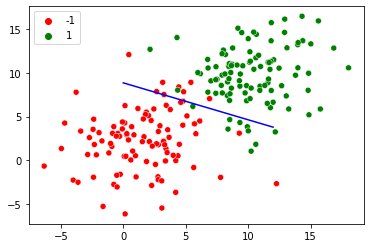

Accuracy 94.5
Weight w0 = -216.5183414983777, w1 = 12.129776253534475, w2 =22.240888123644872


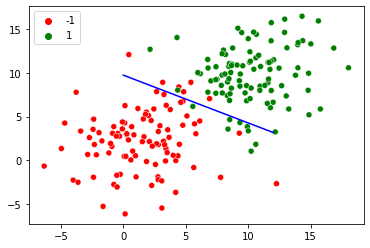

Accuracy 95.5
Weight w0 = -217.5183414983777, w1 = 15.65055723612789, w2 =21.036983759337026


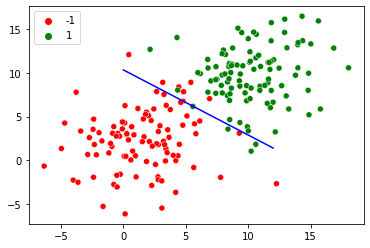

Accuracy 92.5
Weight w0 = -218.5183414983777, w1 = 14.707064413417053, w2 =17.944453449030426


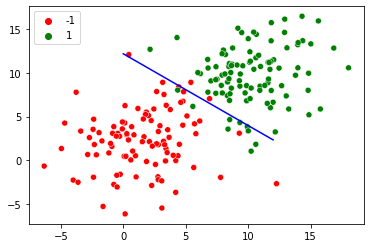

Accuracy 95.5
Weight w0 = -219.5183414983777, w1 = 12.959845185267694, w2 =20.79237947616268


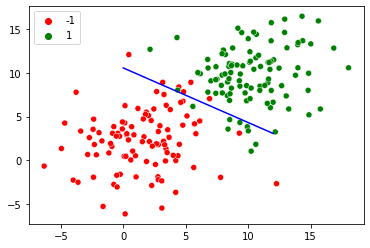

Accuracy 95.5
Weight w0 = -220.5183414983777, w1 = 14.736731031352418, w2 =23.304968797473883


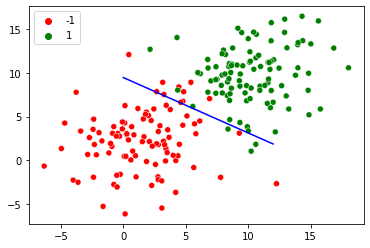

Accuracy 93.0
Weight w0 = -220.5183414983777, w1 = 21.59520016131252, w2 =20.938701603264157


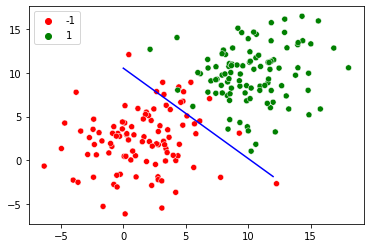

Accuracy 96.5
Weight w0 = -221.5183414983777, w1 = 12.080275901606013, w2 =22.005369352265966


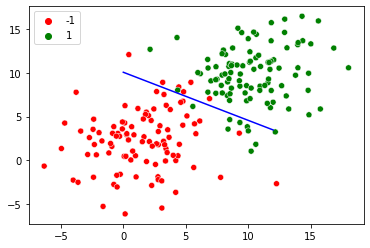

Accuracy 95.5
Weight w0 = -222.5183414983777, w1 = 13.857161747690737, w2 =24.51795867357717


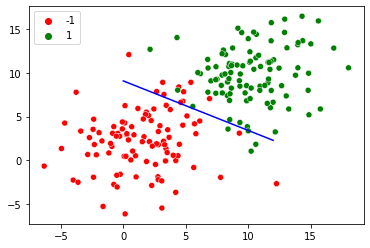

Accuracy 95.0
Weight w0 = -222.5183414983777, w1 = 14.741244915744582, w2 =23.88492801566388


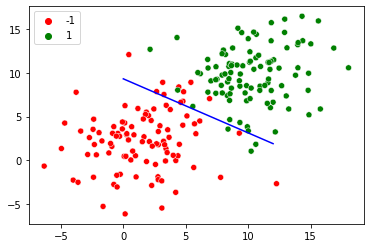

Accuracy 93.0
Weight w0 = -222.5183414983777, w1 = 21.59971404570468, w2 =21.518660821454155


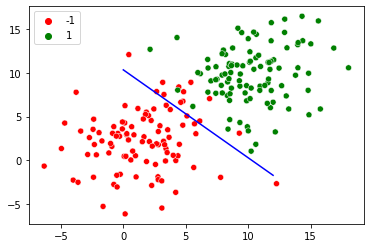

Accuracy 96.5
Weight w0 = -223.5183414983777, w1 = 12.084789785998174, w2 =22.585328570455964


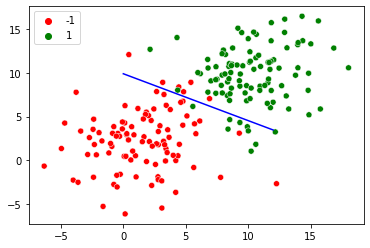

Accuracy 95.5
Weight w0 = -224.5183414983777, w1 = 13.861675632082898, w2 =25.097917891767175


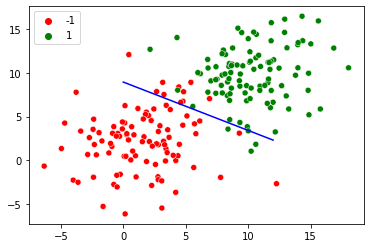

Accuracy 95.0
Weight w0 = -224.5183414983777, w1 = 14.745758800136743, w2 =24.464887233853887


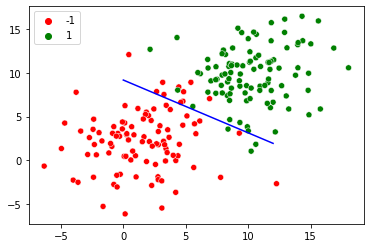

(array([14.7457588 , 24.46488723]), -224.5183414983777)

In [69]:
classifier(w,w0,x,y, iters = 100)

In [71]:
import os

'C:\\Users\\ayesha'